In [ ]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of flatbuffers or contac

In [ ]:
pip install rasterio

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:00:01
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: flatbuffers 1.12.1-git20200711.33e2d80-dfsg1-0.6 has a non-standard version number. pip 24.1 will enforce this 

In [ ]:
import cv2
import glob
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
temp = np.load('/home/anishio/Downloads/scan674.npy')

temp.shape

(963, 128, 128)

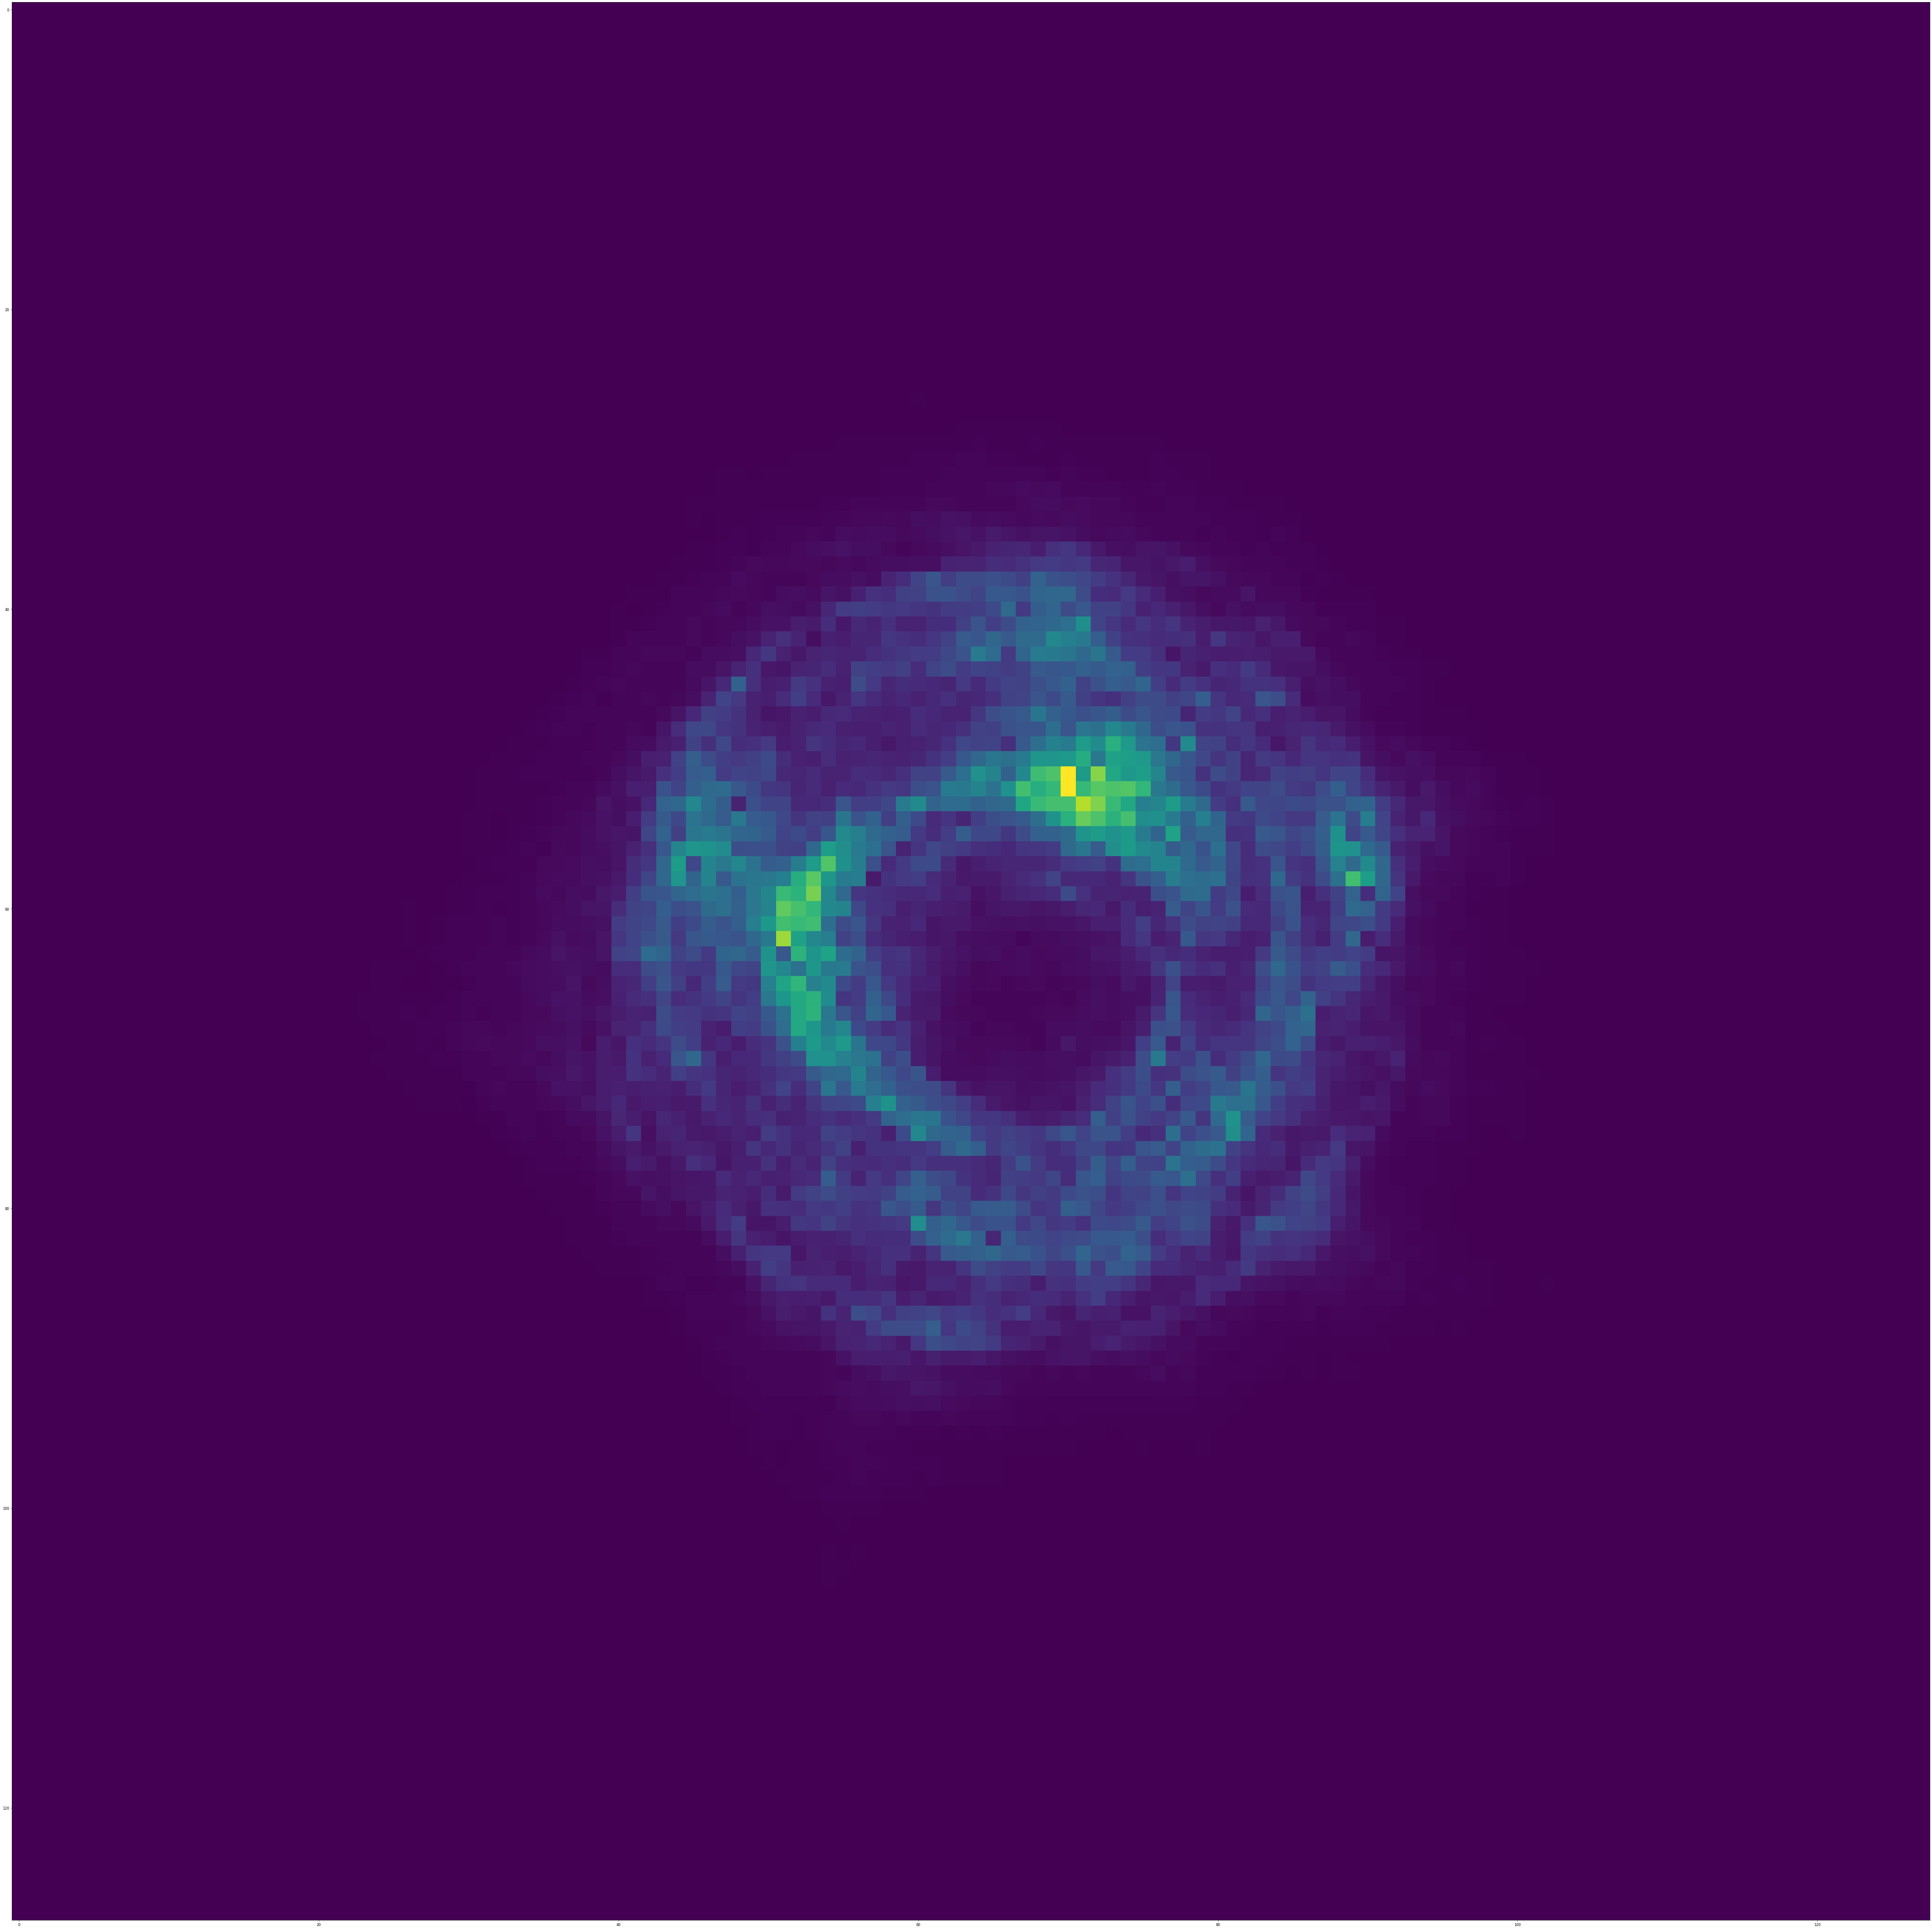

In [ ]:
plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(temp[962])
plt.show()

In [ ]:
temp[0][1]

array([1, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 0, 3, 1, 3, 0, 1, 0, 1, 3, 1, 3, 1, 5, 3, 3, 2, 5,
       3, 5, 2, 4, 5, 2, 4, 3, 2, 7, 3, 4, 3, 3, 2, 2, 2, 4, 5, 1, 3, 5,
       1, 6, 2, 6, 3, 3, 2, 4, 1, 2, 4, 1, 3, 3, 1, 2, 3, 2, 3, 3, 3, 1,
       1, 1, 0, 1, 3, 1, 1, 2, 4, 3, 1, 2, 2, 2, 2, 2, 3, 0, 2, 1, 1, 2,
       1, 3, 1, 2, 3, 3, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0], dtype=int32)

In [ ]:
x_min = temp[1].min()
x_max = temp[1].max()
y_min = temp[2].min()
y_max = temp[2].max()

x_min, x_max, y_min, y_max

(0, 57420, 0, 50074)

In [ ]:
cal_image_path = '/home/anishio/Documents/ExampleData/40x41/calibration/CeO2_DMM30keV_400mm_20sec_PE_001.tif'
scan_image_path = glob.glob('/home/anishio/Documents/ExampleData/40x41/DMM_Zr_0p66GPa/*.tif')

cal = cv2.imread(cal_image_path).astype('float64')
scan1 = cv2.imread(scan_image_path[0]).astype('float64')

In [ ]:
cal.shape

(2048, 2048, 3)

[[[0 5 0 ... 1 0 2]
  [0 1 3 ... 0 1 0]
  [0 1 2 ... 0 0 1]
  ...
  [5 1 0 ... 2 2 0]
  [5 2 0 ... 1 1 2]
  [0 5 5 ... 4 0 2]]]


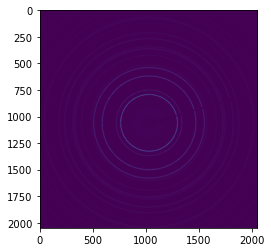

In [ ]:
import rasterio
from rasterio.plot import show

with rasterio.open(cal_image_path, 'r') as image:
    # print(image.dtype, np.max(image))
    arr = image.read()  # read all raster values

    print(arr)

    show(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


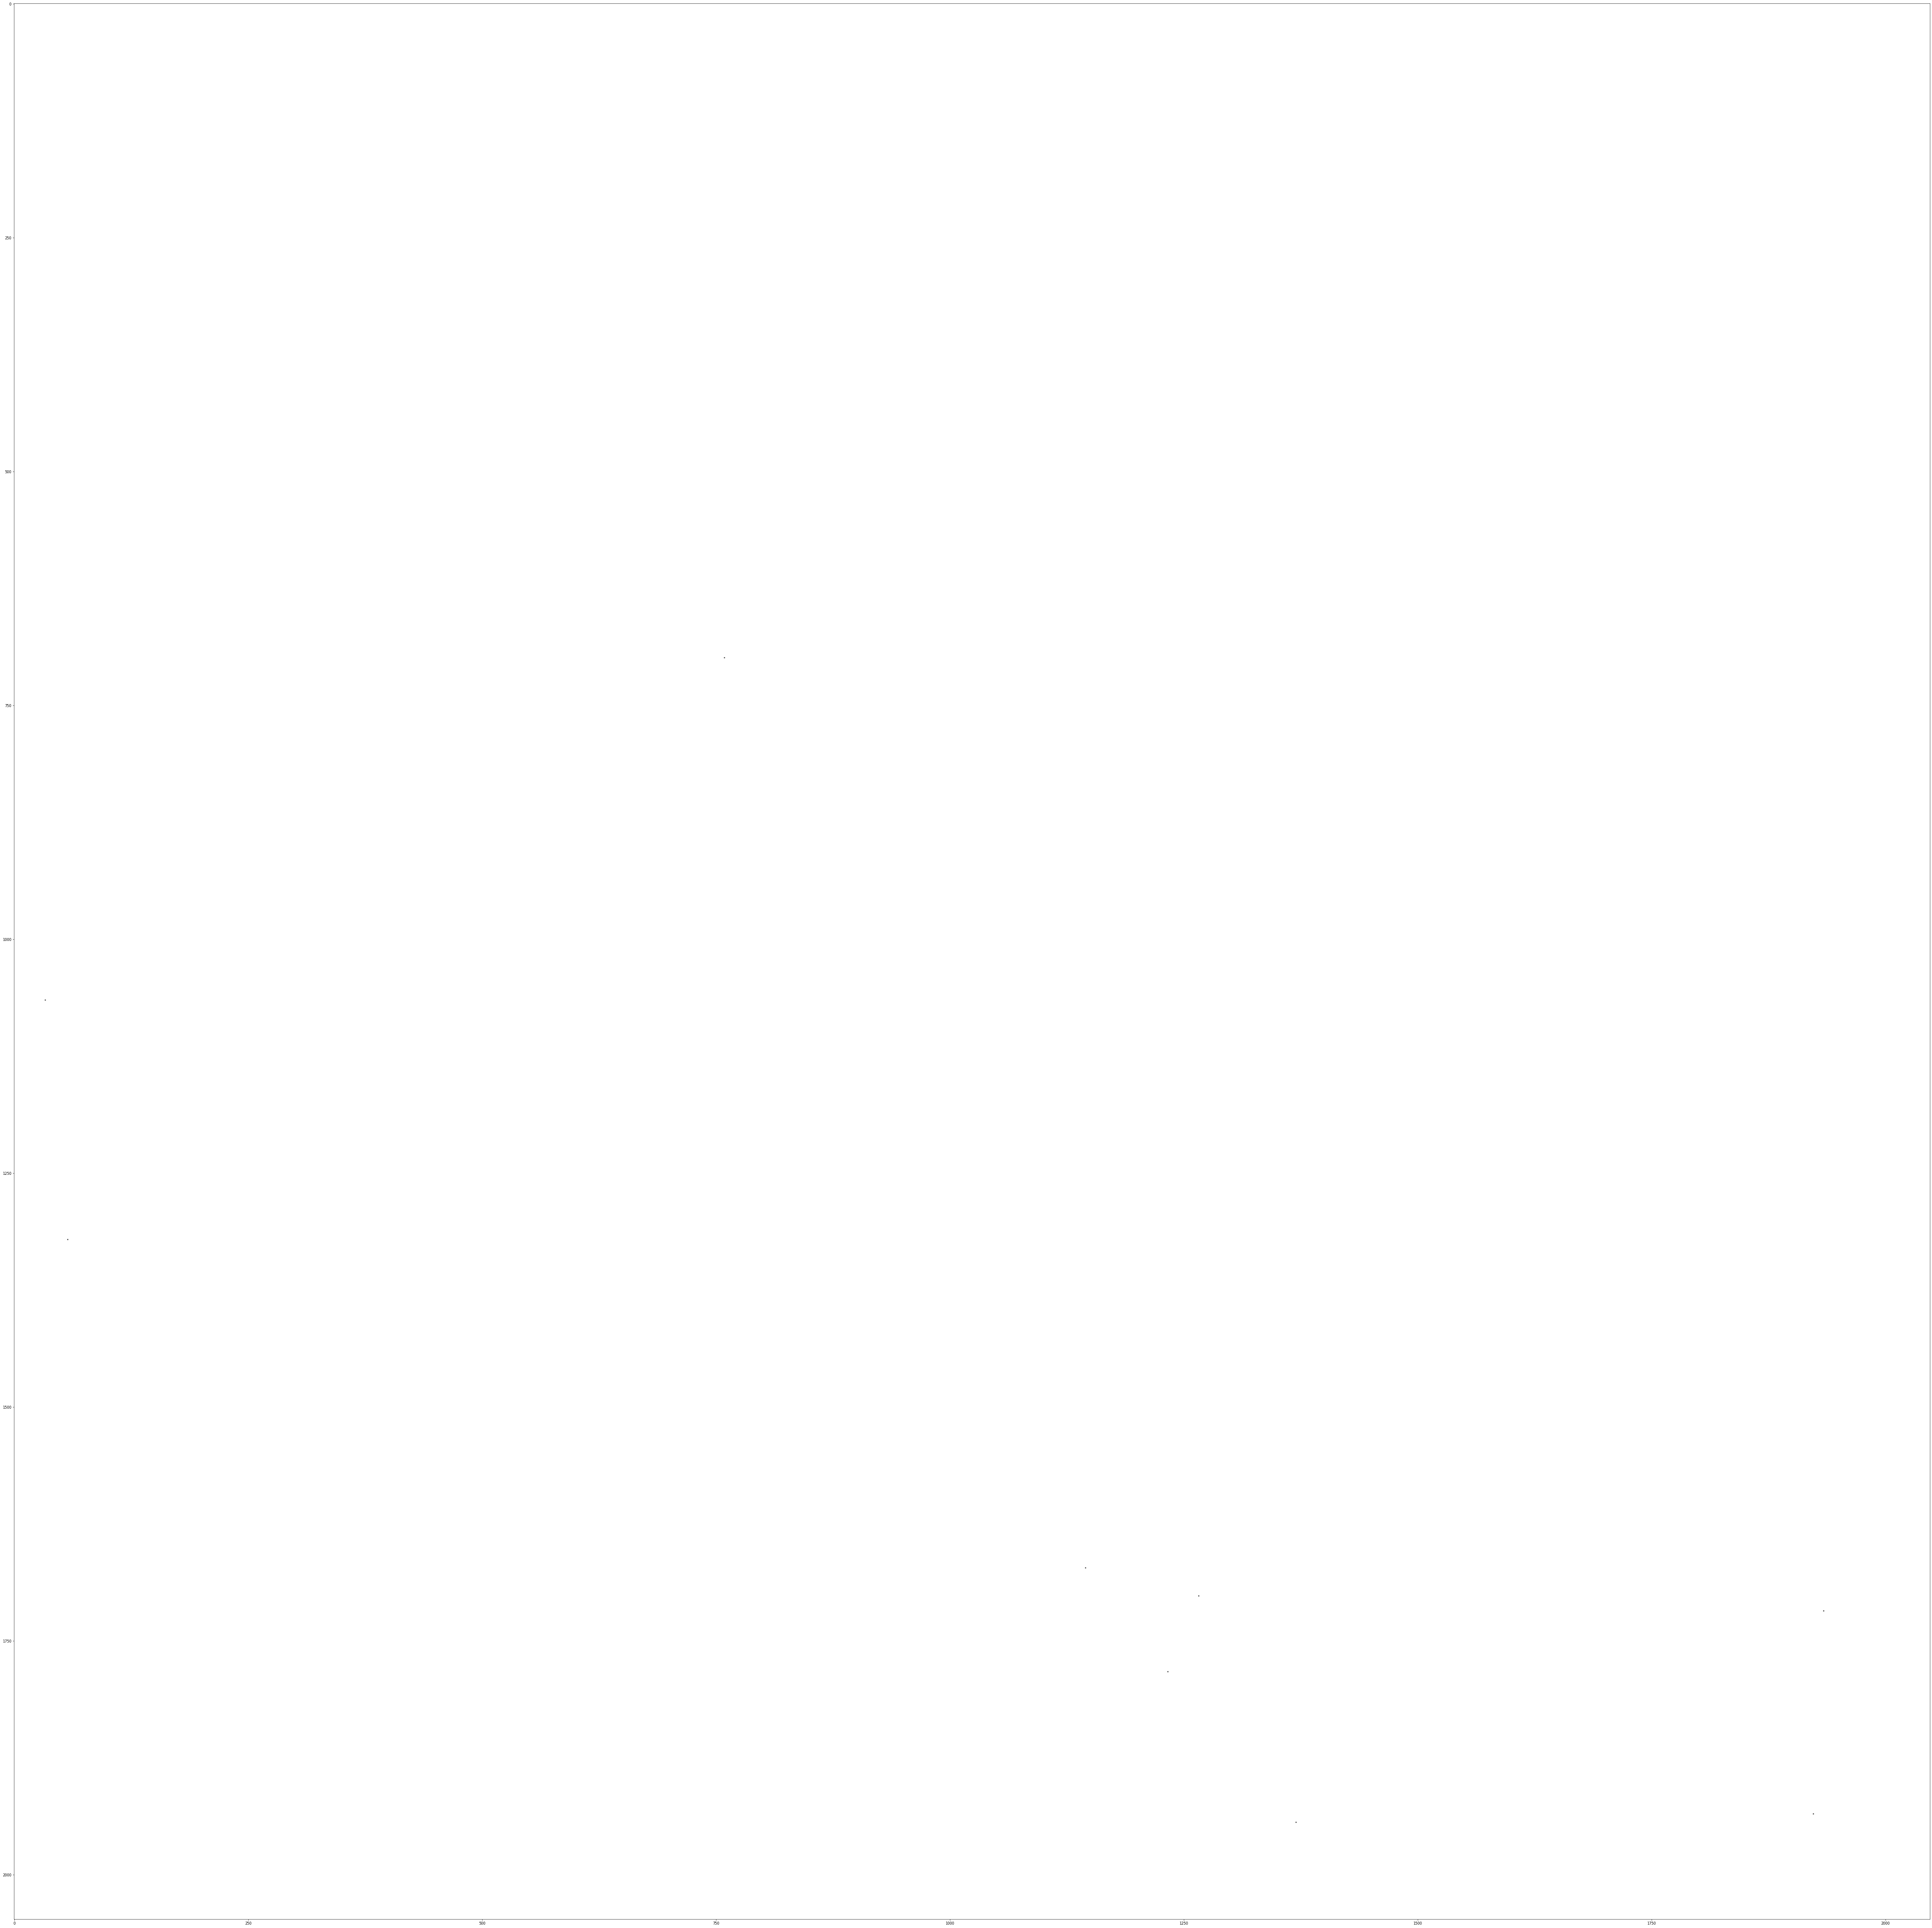

In [ ]:
image_path = '/home/anishio/Documents/ExampleData/Zr_annealed_0p66GPa_SXDM_1361.tif'

scan3 = cv2.imread(image_path).astype('float64')

plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(scan3)
plt.show()

In [ ]:
scan1.shape

(2048, 2048, 3)

In [ ]:
white_scan = np.nonzero(scan1)
white_scan

(array([  45,   45,   45, ..., 1927, 1927, 1927]),
 array([ 746,  746,  746, ..., 1868, 1868, 1868]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [ ]:
x_min = white_scan[1].min()
x_max = white_scan[1].max()
y_min = white_scan[0].min()
y_max = white_scan[0].max()

x_min, x_max, y_min, y_max

(67, 1932, 45, 1927)

In [ ]:
list_coords = tuple(zip(white_scan[1], white_scan[0]))

# filtering out redundant coords
list_coords = list(dict.fromkeys(list_coords))

print(list_coords)

[(746, 45), (746, 46), (747, 46), (746, 47), (747, 47), (747, 48), (747, 49), (748, 49), (747, 50), (544, 72), (545, 72), (544, 73), (545, 73), (546, 73), (544, 74), (545, 74), (546, 74), (544, 75), (545, 75), (546, 75), (545, 76), (546, 76), (547, 76), (546, 77), (547, 77), (547, 78), (549, 81), (286, 92), (287, 92), (287, 93), (137, 94), (287, 94), (288, 94), (289, 94), (288, 95), (289, 95), (290, 95), (288, 96), (289, 96), (290, 96), (291, 96), (288, 97), (289, 97), (290, 97), (291, 97), (292, 97), (291, 98), (292, 98), (293, 98), (291, 99), (292, 99), (293, 99), (292, 100), (293, 100), (909, 170), (908, 171), (909, 173), (909, 174), (909, 175), (908, 176), (909, 176), (910, 176), (909, 177), (910, 177), (909, 178), (910, 178), (961, 178), (908, 179), (909, 179), (910, 179), (960, 179), (961, 179), (962, 179), (909, 180), (910, 180), (911, 180), (960, 180), (961, 180), (962, 180), (908, 181), (909, 181), (910, 181), (911, 181), (959, 181), (960, 181), (961, 181), (962, 181), (908, 1

In [ ]:
from sklearn.cluster import DBSCAN

points = np.array(list_coords)

distance, min_samples = 51, 1

db = DBSCAN(eps = distance, min_samples = min_samples).fit(points)

print("Num Clusters:", db.labels_.max() + 1)

Num Clusters: 46


In [ ]:
coords = []
dist = []

for i in range(db.labels_.max() + 1):
#     coord = np.round(np.mean(points[db.labels_ == i], axis = 0)).astype(int)
    dist_spread = np.round(np.max(points[db.labels_ == i], axis = 0) - np.min(points[db.labels_ == i], axis = 0)).astype(int)
    coord = np.round(np.min(points[db.labels_ == i], axis = 0) + dist_spread / 2).astype(int)

    coords.append((coord[0].item(), coord[1].item()))
    dist.append((dist_spread[0].item(), dist_spread[1].item()))

print("Coords:")
print(coords)
print("\nDist:")
print(dist)

Coords:
[(747, 48), (546, 76), (290, 96), (137, 94), (936, 182), (555, 280), (655, 289), (110, 406), (1542, 432), (1752, 432), (1146, 450), (1835, 544), (298, 565), (1264, 592), (1096, 595), (584, 613), (74, 650), (1048, 720), (1172, 774), (526, 757), (440, 800), (1226, 943), (702, 950), (1634, 1102), (561, 1124), (1877, 1126), (1856, 1202), (780, 1299), (1264, 1298), (1844, 1318), (483, 1387), (325, 1456), (1930, 1487), (1703, 1505), (670, 1520), (1167, 1566), (988, 1586), (1266, 1586), (1069, 1640), (883, 1670), (636, 1688), (454, 1752), (620, 1766), (1339, 1848), (592, 1880), (1862, 1920)]

Dist:
[(2, 5), (5, 9), (7, 8), (0, 0), (55, 23), (4, 7), (10, 14), (7, 5), (23, 29), (1, 0), (3, 10), (10, 8), (0, 0), (44, 29), (0, 0), (0, 0), (14, 5), (1, 3), (29, 42), (8, 6), (15, 7), (0, 0), (9, 4), (6, 2), (0, 0), (14, 3), (45, 21), (5, 6), (3, 3), (20, 10), (16, 10), (4, 3), (5, 2), (0, 0), (0, 0), (2, 4), (6, 19), (1, 1), (2, 4), (2, 5), (7, 11), (2, 3), (0, 0), (8, 15), (13, 17), (12, 1

In [ ]:
offset = 15

patch_size = []

for i in range(db.labels_.max() + 1):
    width = dist[i][0] * 1.5 + offset
    height = dist[i][1] * 1.5 + offset

    length = max(width, height)

    patch_size.append(length)

#     patch_size.append((width, height)

print("Square Sizes:")
print(patch_size)

Square Sizes:
[22.5, 28.5, 27.0, 15.0, 97.5, 25.5, 36.0, 25.5, 58.5, 16.5, 30.0, 30.0, 15.0, 81.0, 15.0, 15.0, 36.0, 19.5, 78.0, 27.0, 37.5, 15.0, 28.5, 24.0, 15.0, 36.0, 82.5, 24.0, 19.5, 45.0, 39.0, 21.0, 22.5, 15.0, 15.0, 21.0, 43.5, 16.5, 21.0, 22.5, 31.5, 19.5, 15.0, 37.5, 40.5, 34.5]


In [ ]:
print(scan1.shape)

(2048, 2048, 3)


In [ ]:
index = 4

offset = np.round(patch_size[index] / 2).astype(int)

cropped_image = scan1[coords[index][1] - offset:coords[index][1] + offset,
                      coords[index][0] - offset:coords[index][0] + offset]

In [ ]:
row = []
row = cropped_image
np.nonzero(row)

(array([37, 37, 37, 38, 38, 38, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43,
        43, 43, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45,
        45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46,
        46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47,
        47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48,
        48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49,
        49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51,
        51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
        53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
        53, 

In [ ]:
scan = cv2.imread(scan_image_path[1636]).astype('float64')

IndexError: list index out of range

In [ ]:
for i in range(1640):
    scan = cv2.imread(scan_image_path[i]).astype('float64')
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: list index out of range

In [ ]:
patch = []

for i in range(39):
    row = []

    for j in range(41):
        scan = cv2.imread(scan_image_path[i * 41 + j]).astype('float64')

        cropped_image = scan[coords[index][1] - offset:coords[index][1] + offset,
                             coords[index][0] - offset:coords[index][0] + offset]

        if j == 0:
            row = cropped_image
        else:
            row = np.concatenate((row, cropped_image), axis = 1)

    if i == 0:
        patch = row
    else:
        patch = np.concatenate((patch, row), axis = 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


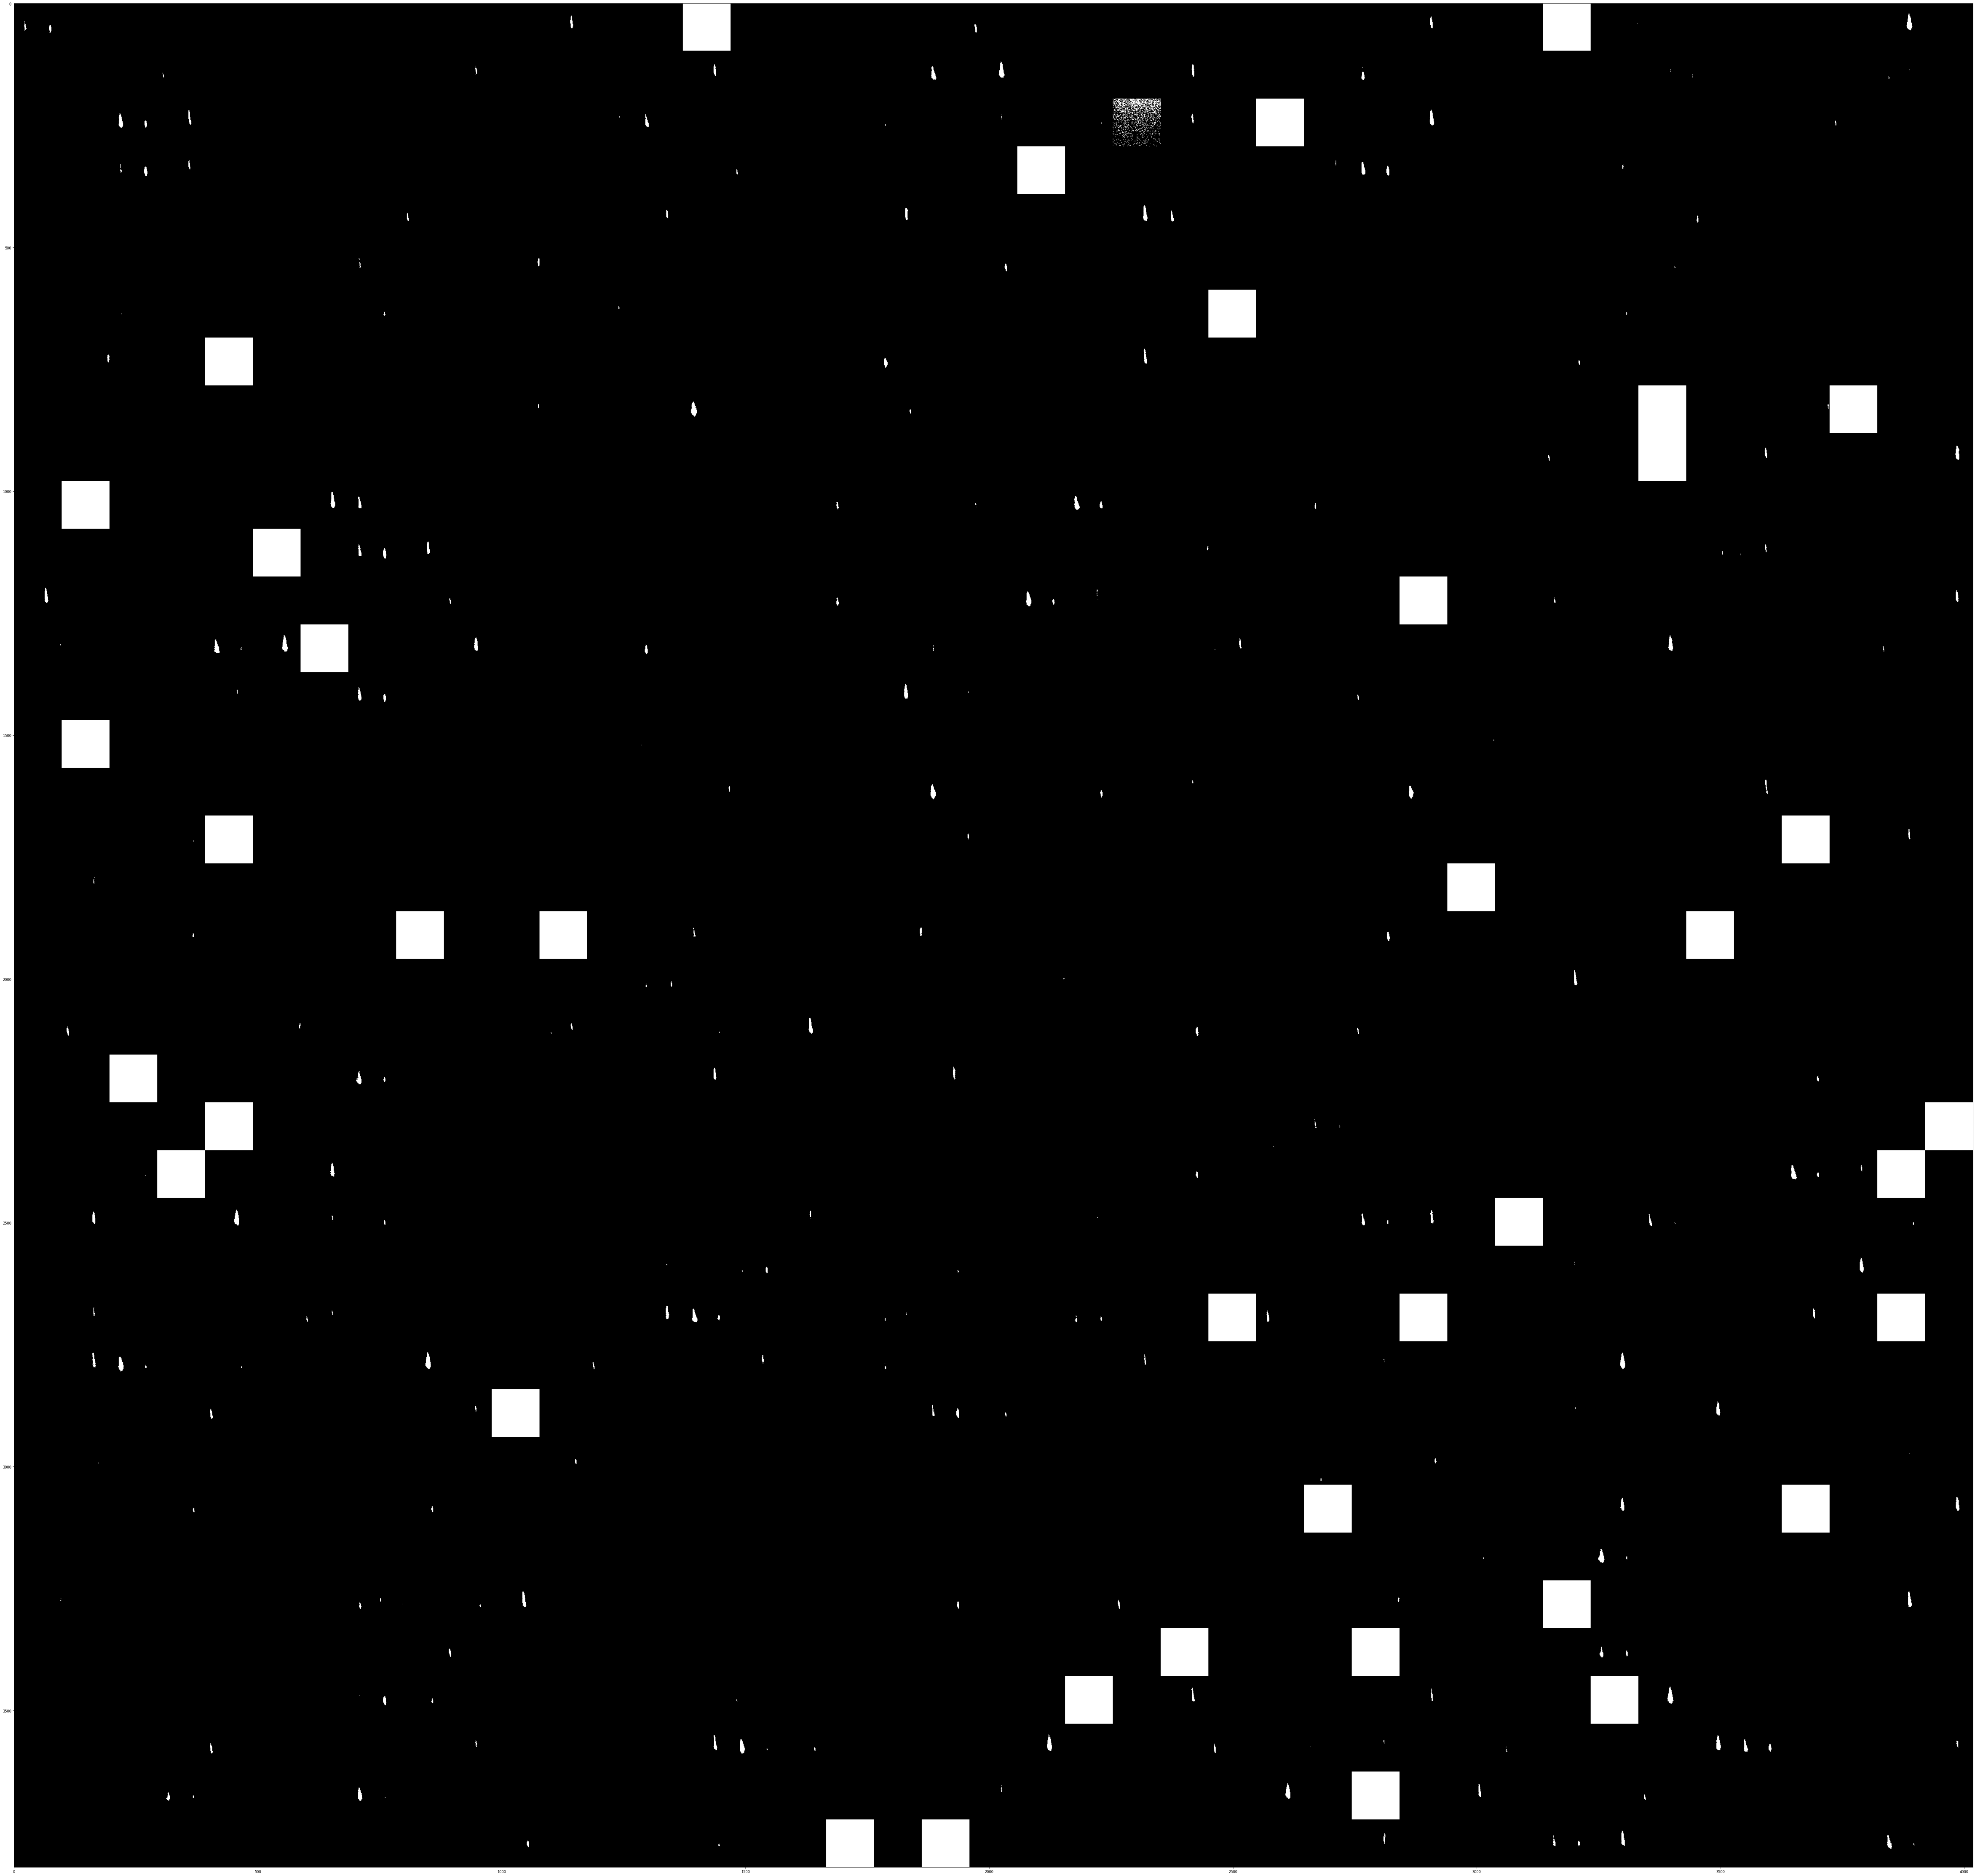

In [ ]:
plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(patch)
plt.show()

In [ ]:
vis = np.concatenate((cropped_image, cropped_image2), axis = 1)

In [ ]:
scan2 = cv2.imread(scan_image_path[14]).astype('float64')

cropped_image = scan2[coords[index][1] - offset:coords[index][1] + offset,
                      coords[index][0] - offset:coords[index][0] + offset]

In [ ]:
scan_image_path[14]

'/home/anishio/Documents/ExampleData/40x41/DMM_Zr_0p66GPa/Zr_annealed_0p66GPa_SXDM_1361.tif'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


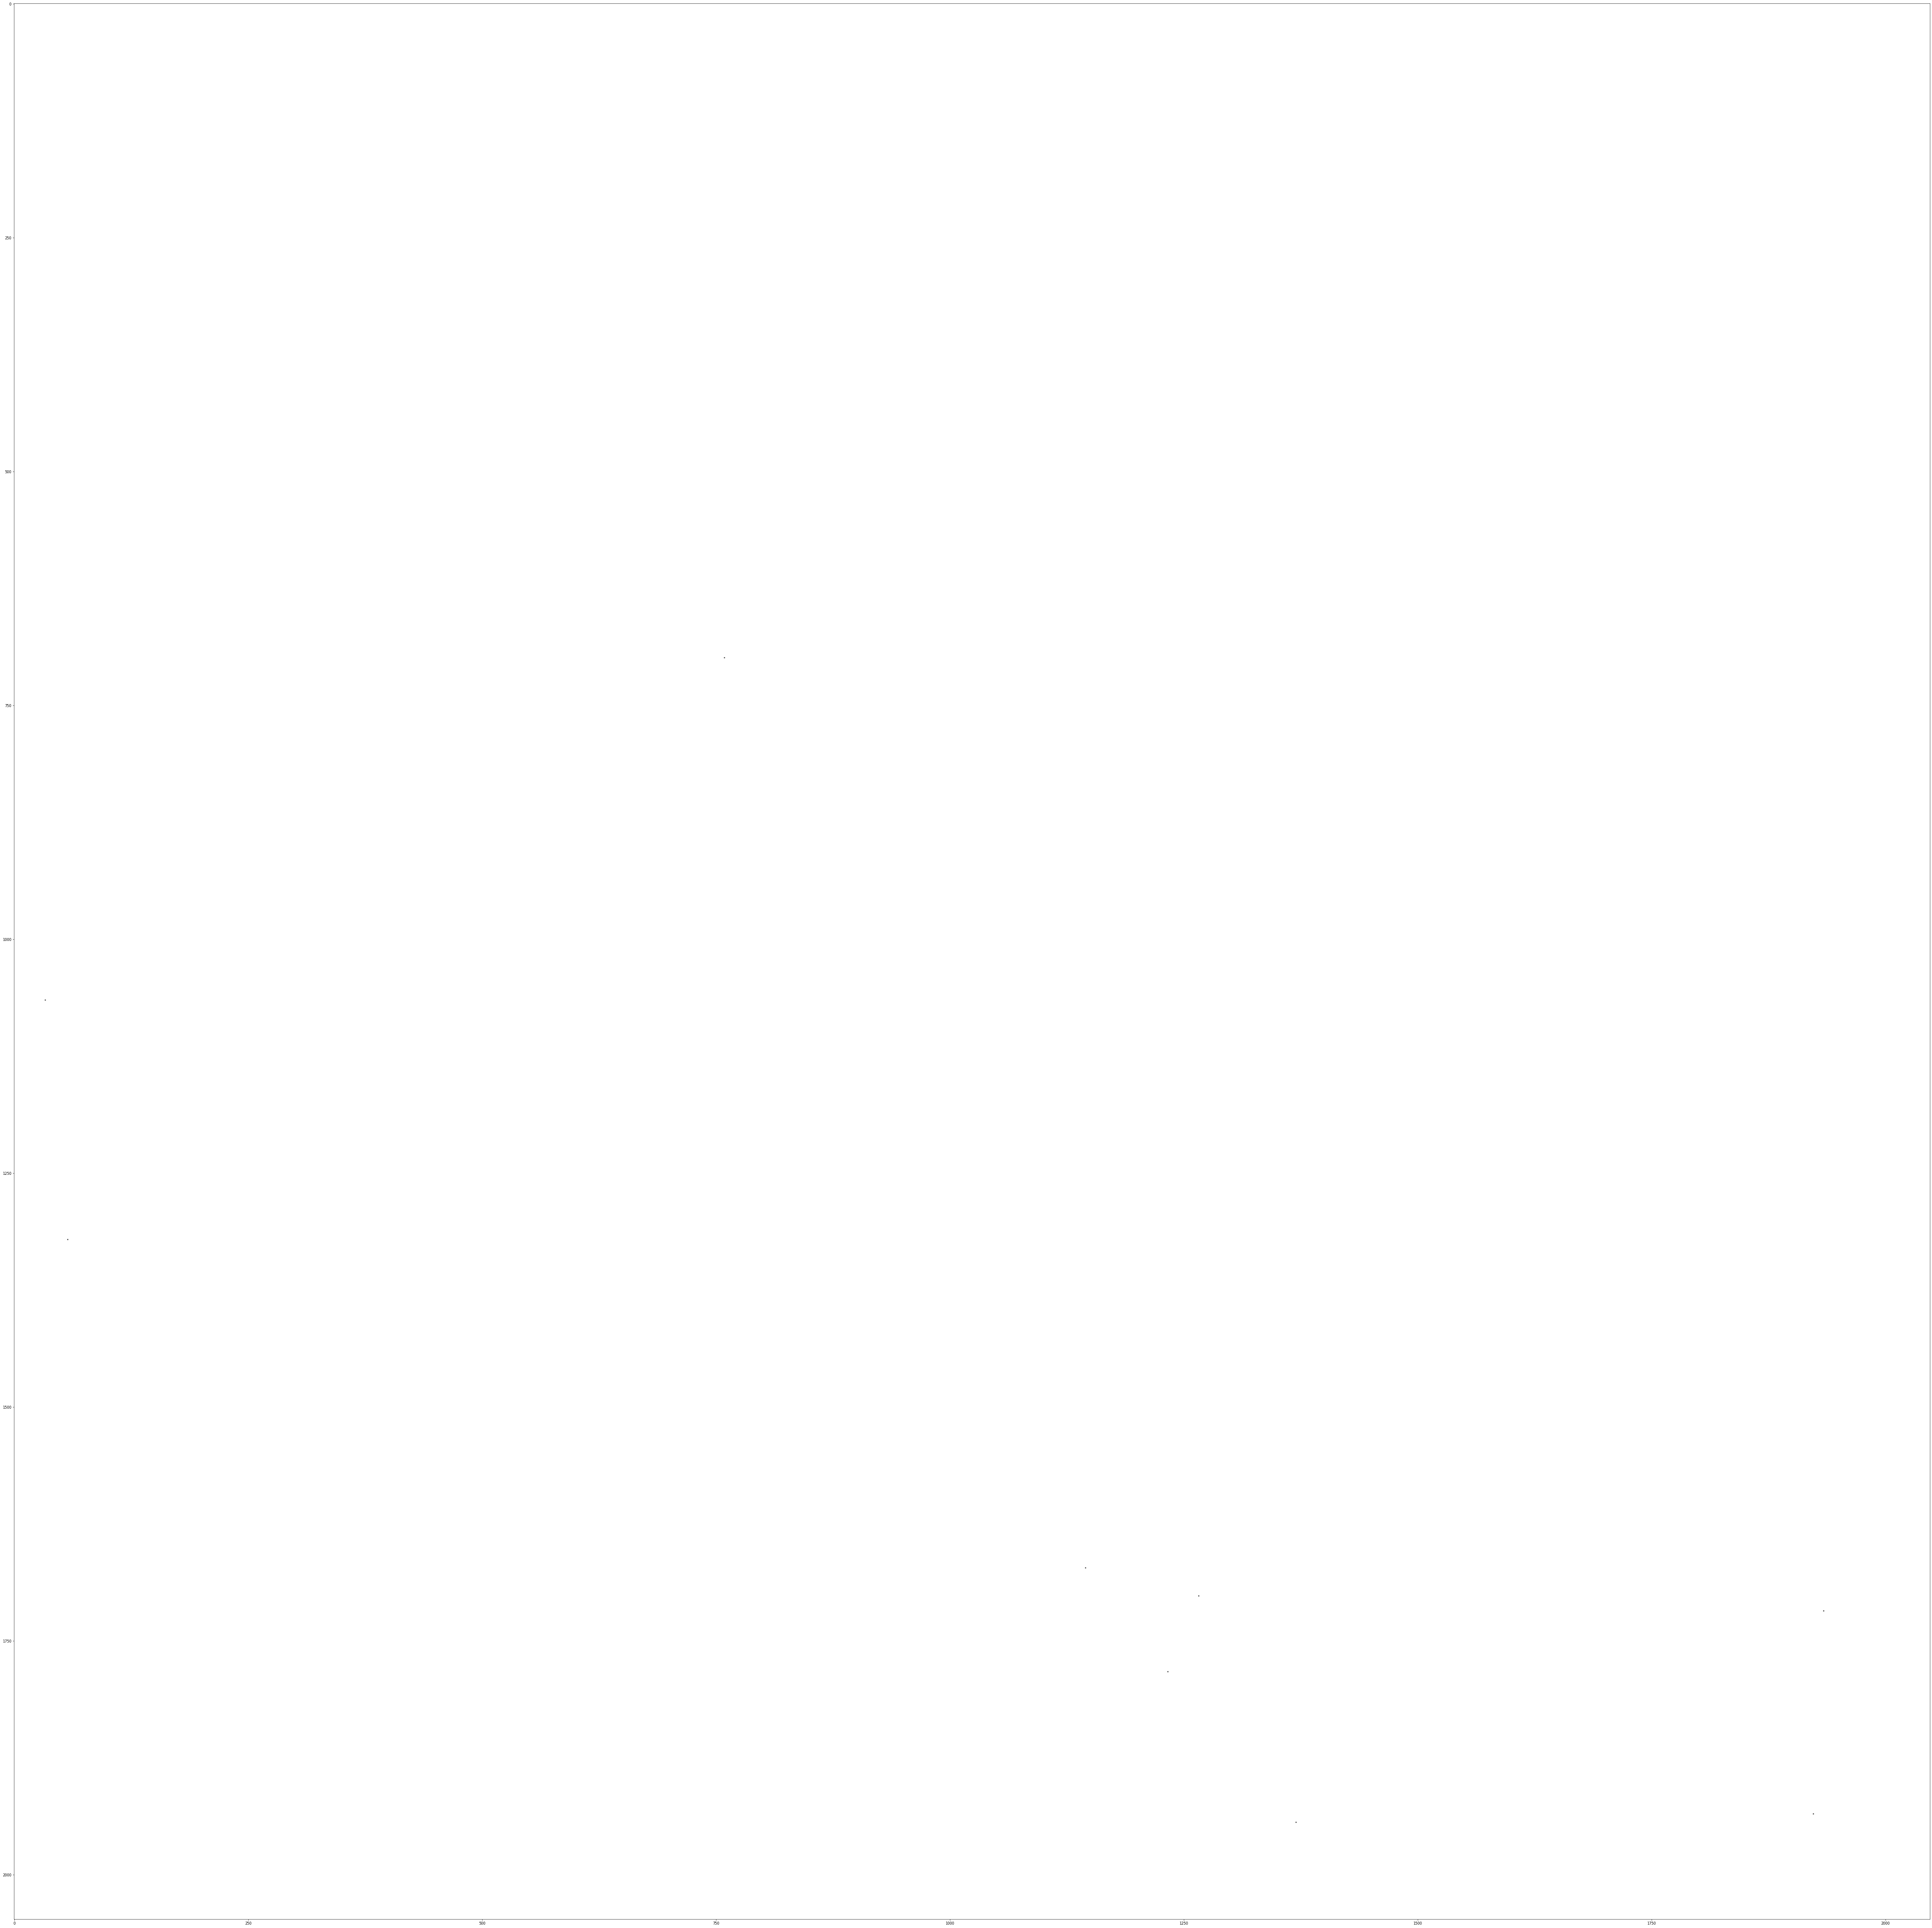

In [ ]:
plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(scan2)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


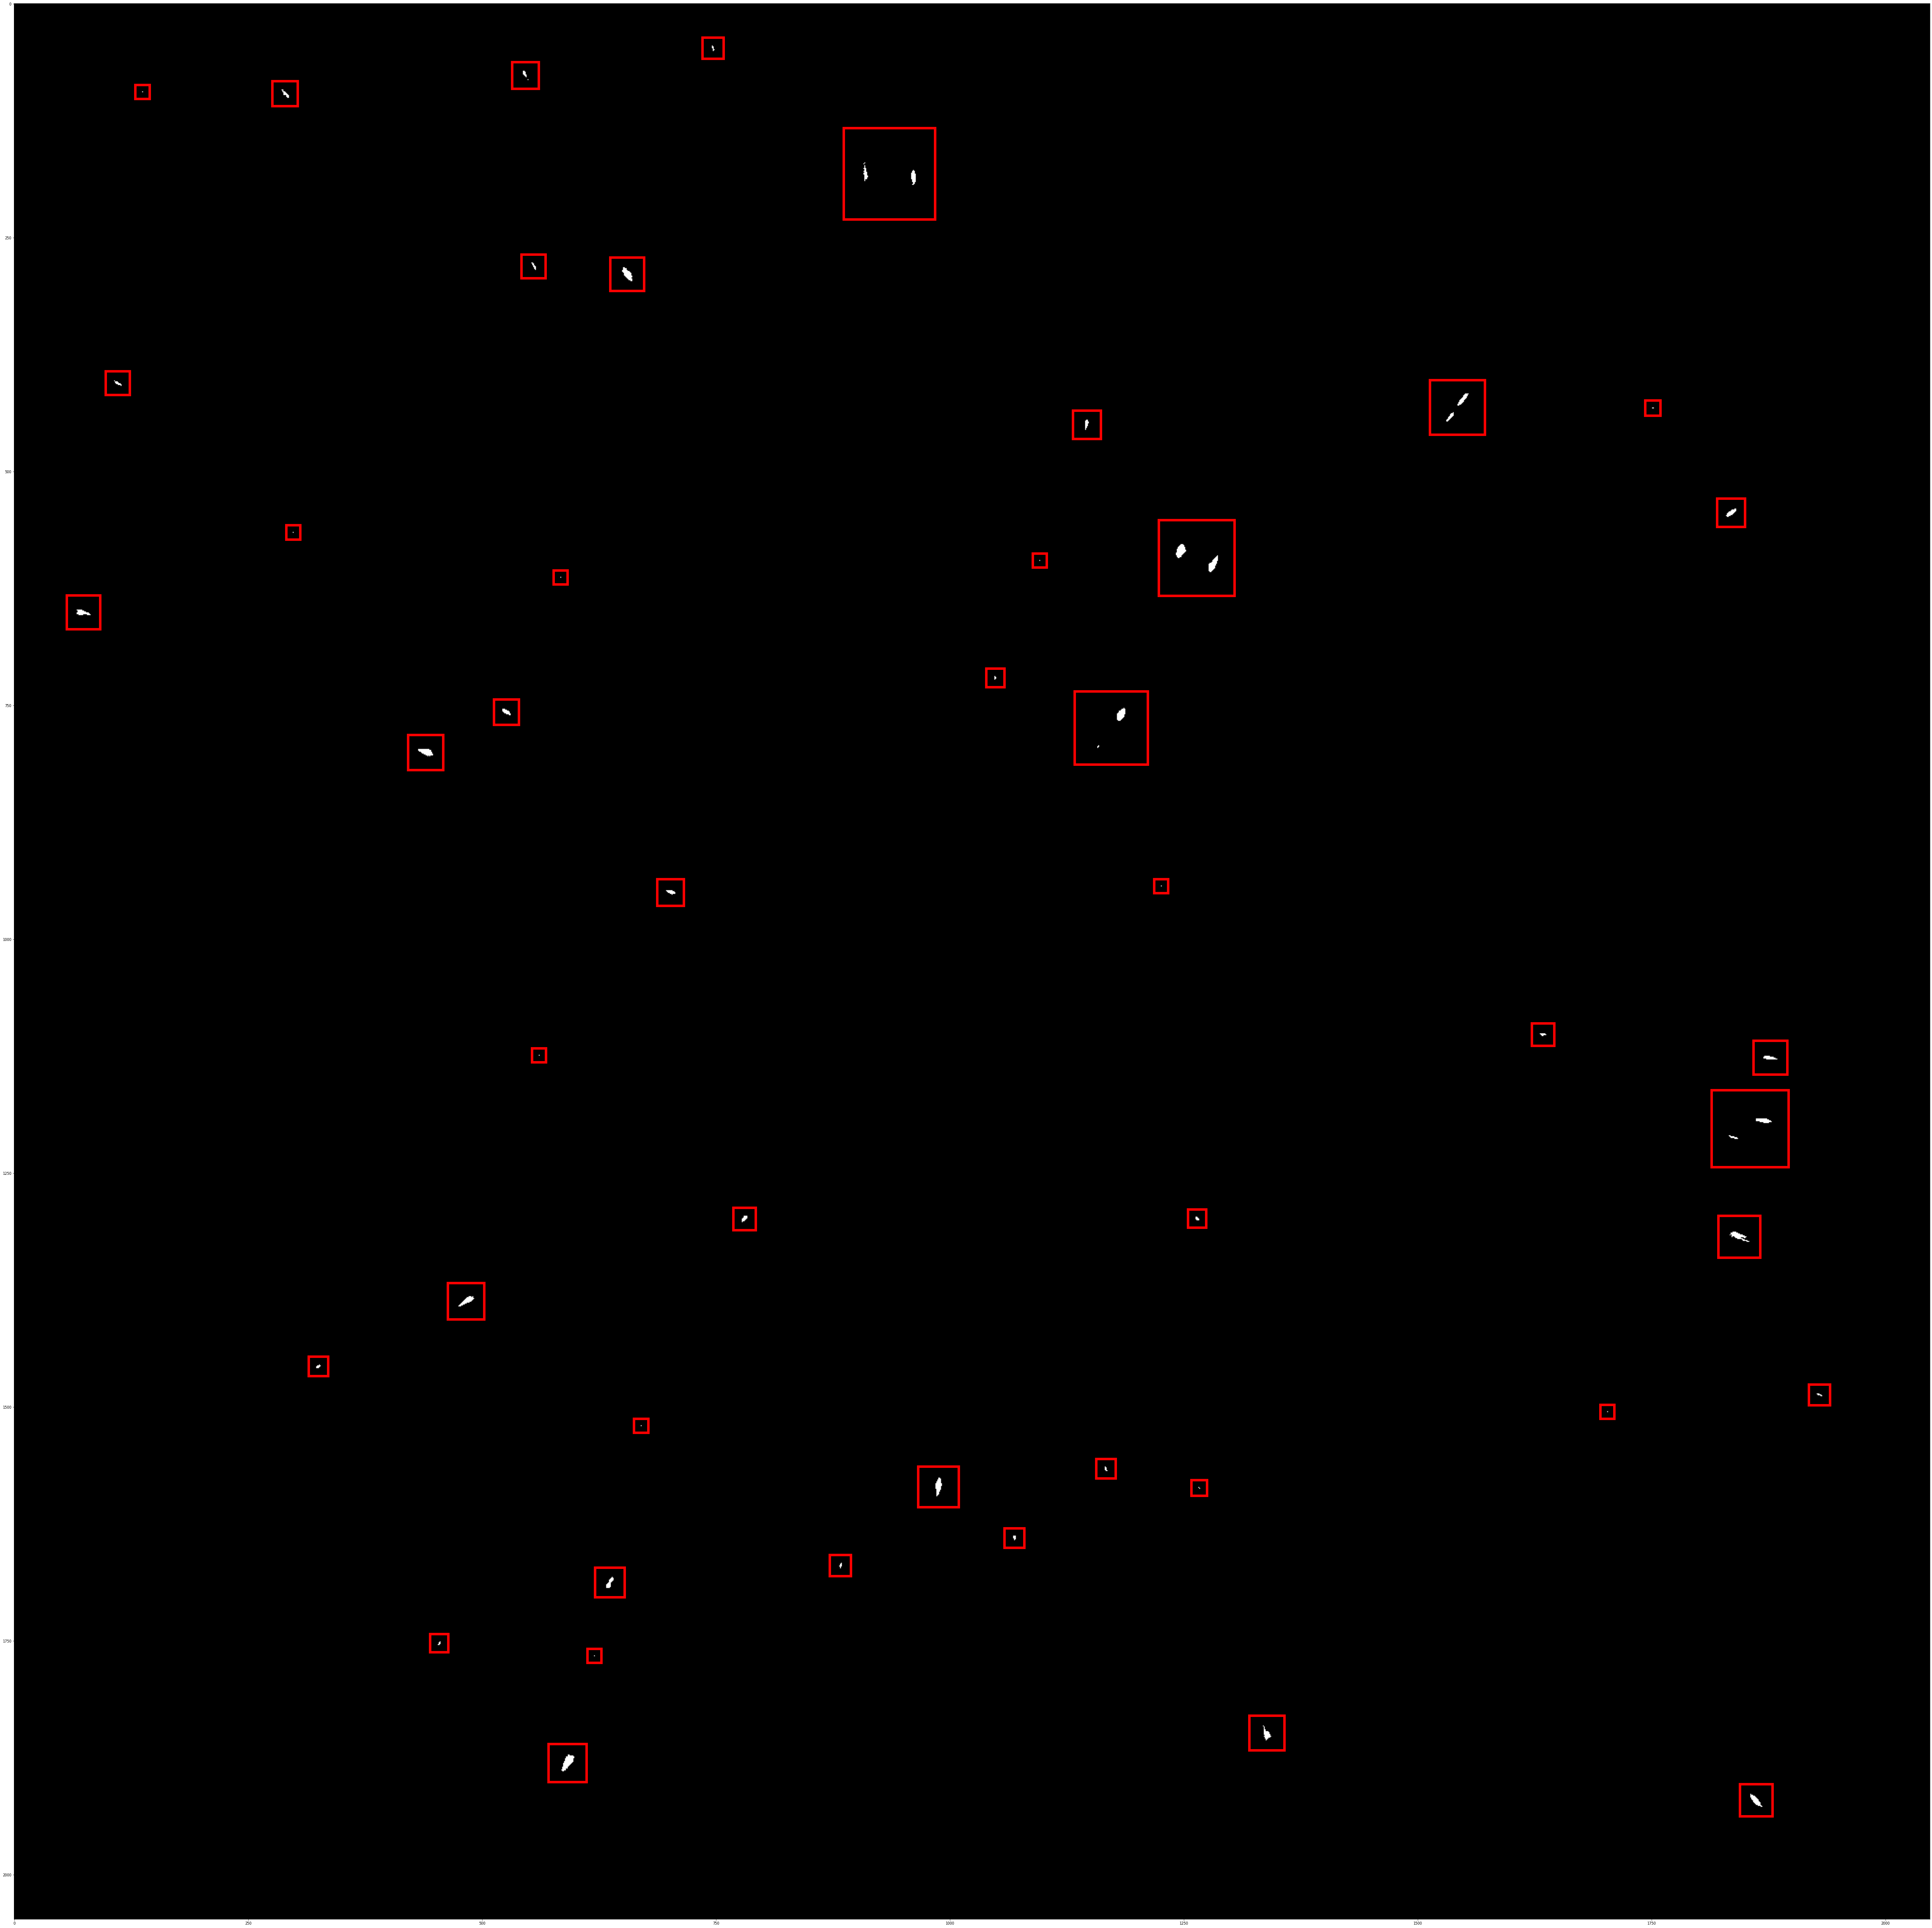

In [ ]:
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(figsize=(100, 100), dpi=60)

# Display the image
ax.imshow(scan1)

# Create a Rectangle patch

for i in range(len(patch_size)):
    length = patch_size[i]

    rect_patch = patches.Rectangle((coords[i][0] - length / 2, coords[i][1] - length / 2),
                                   length, length, linewidth = 7, edgecolor = 'r', facecolor = 'none')

#     rect_patch = patches.Rectangle((coords[i][0] - width / 2, coords[i][1] - height / 2),
#                                    width, height, linewidth = 7, edgecolor = 'r', facecolor = 'none')
    ax.add_patch(rect_patch)

# rect = patches.Rectangle((545-12.5, 75-12.5), 25, 25, linewidth=7, edgecolor='r', facecolor='none')
# rect2 = patches.Rectangle((1838-12.5, 1212-12.5), 25, 25, linewidth=7, edgecolor='r', facecolor='none')
# rect3 = patches.Rectangle((1069-12.5, 1640-12.5), 25, 25, linewidth=7, edgecolor='r', facecolor='none')

# Add the patch to the Axes
# ax.add_patch(rect)
# ax.add_patch(rect2)
# ax.add_patch(rect3)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


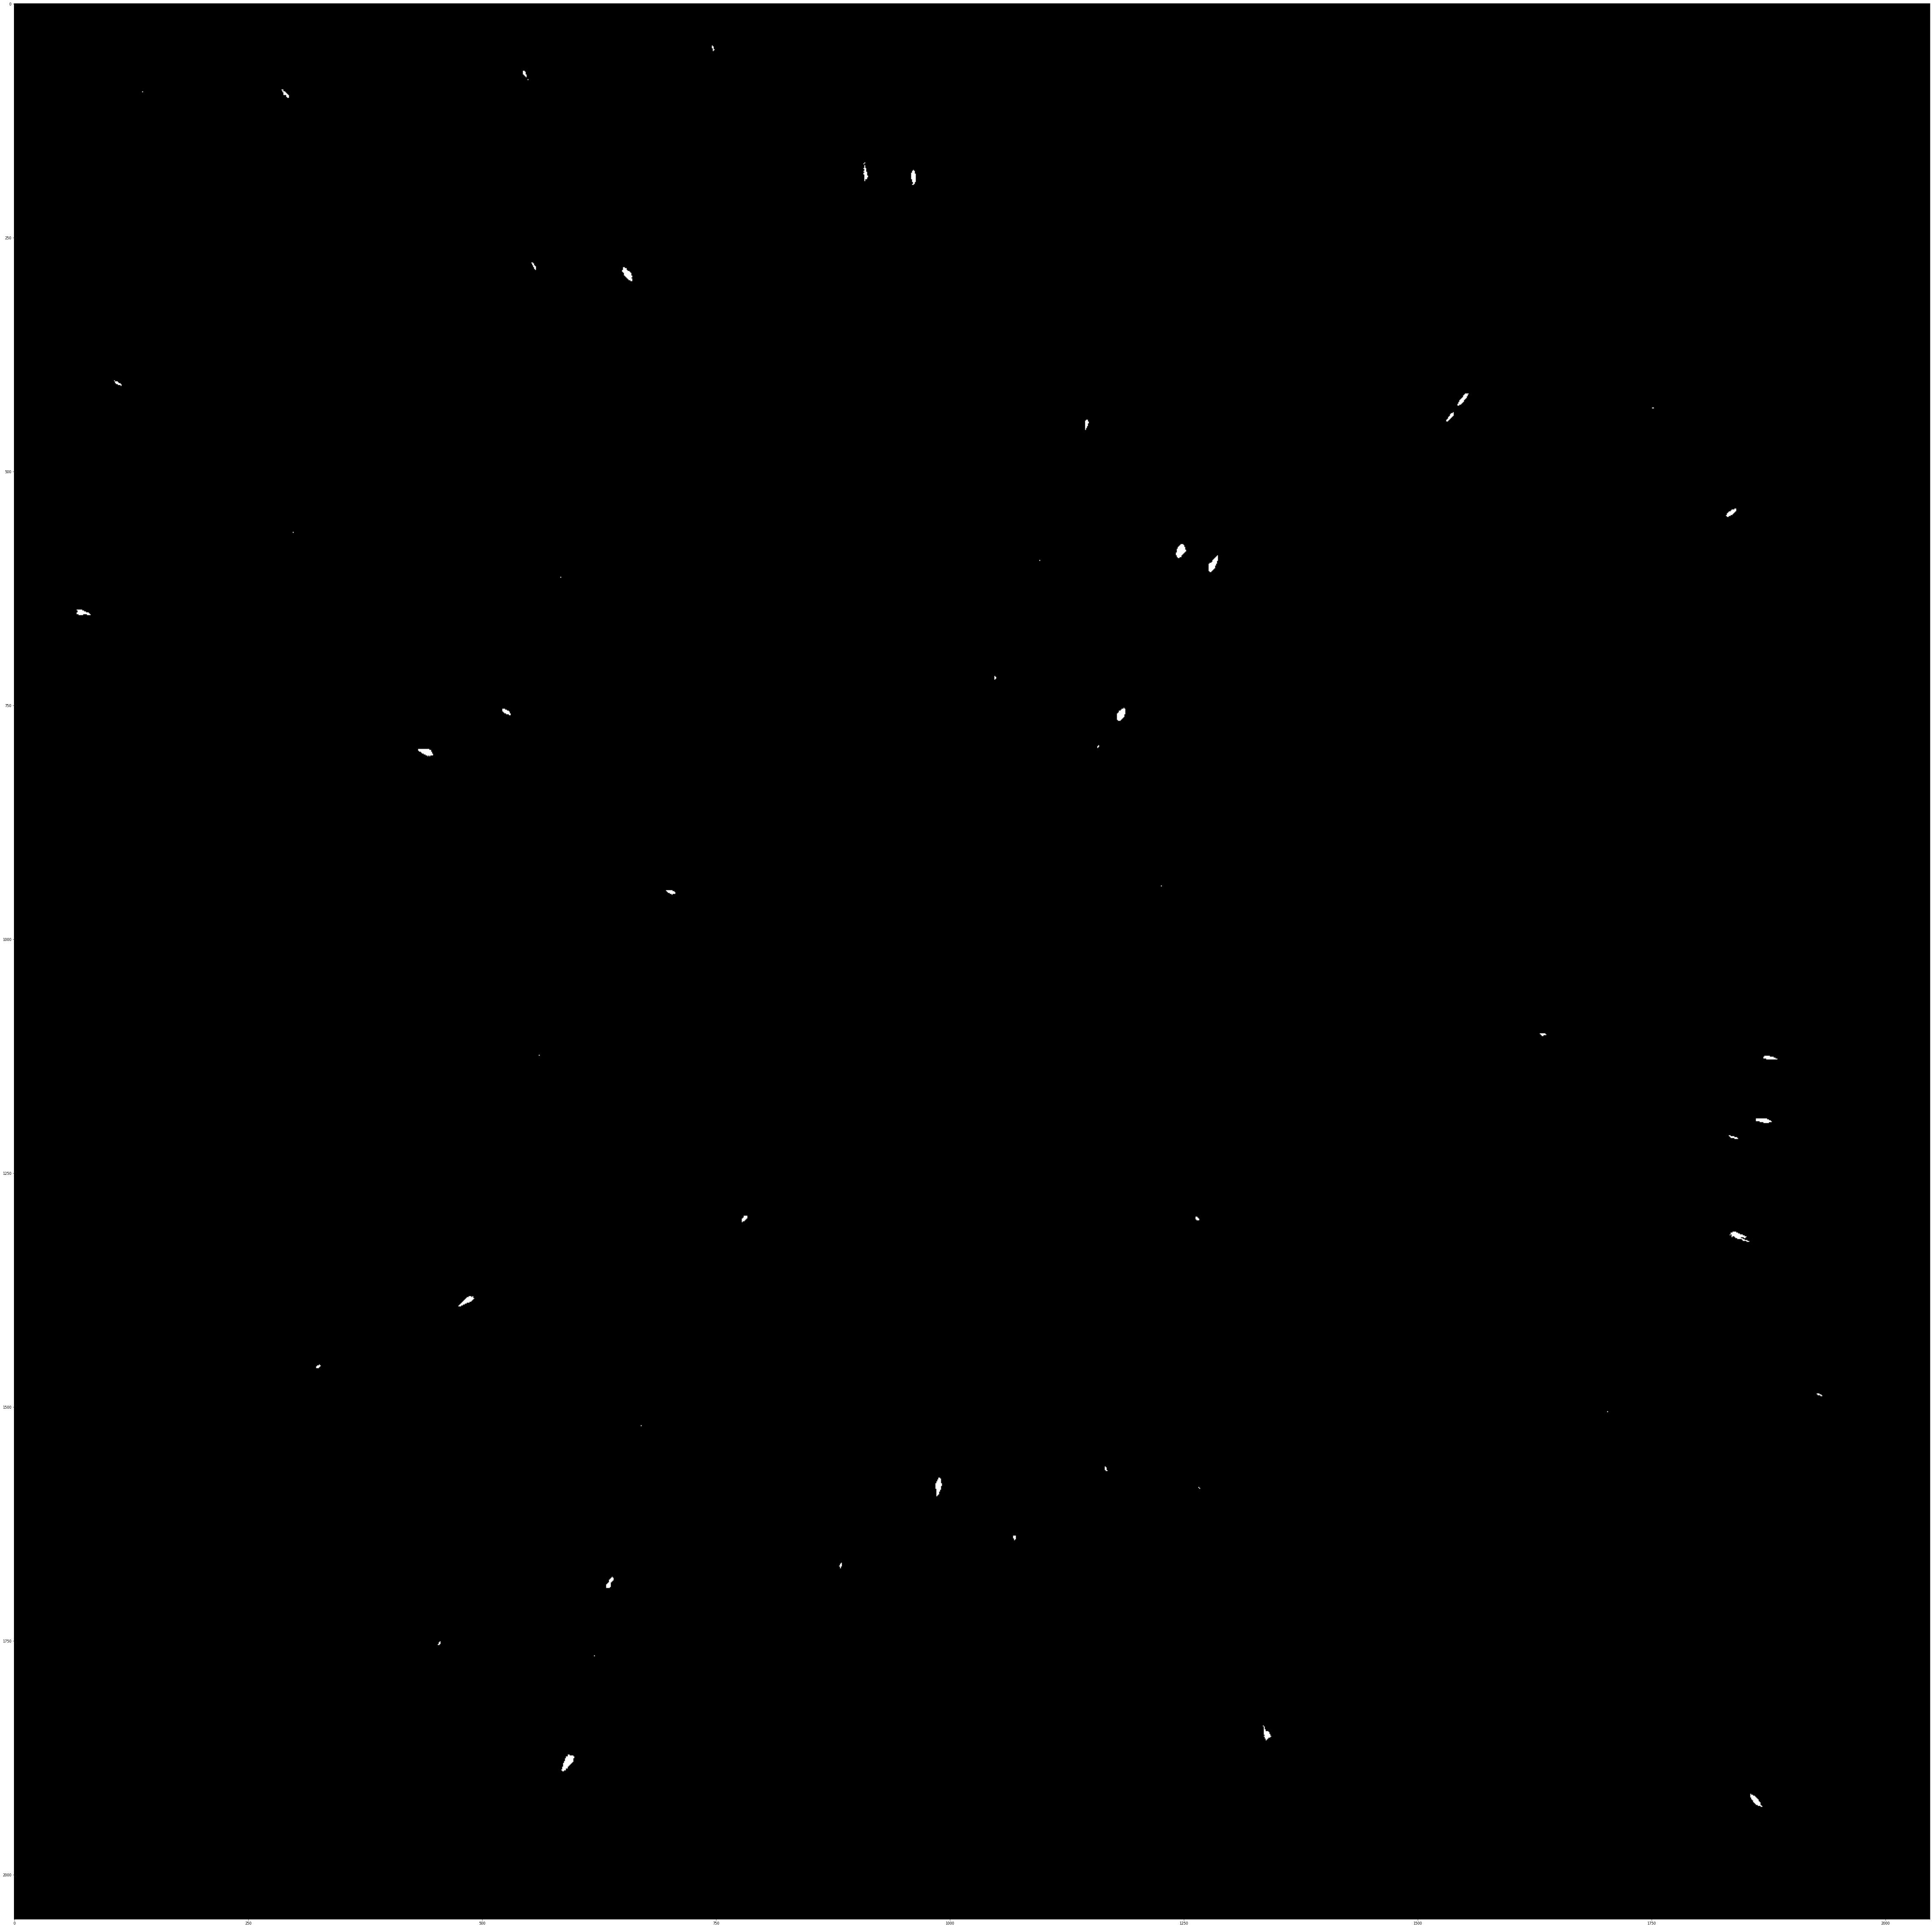

In [ ]:
plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(scan1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


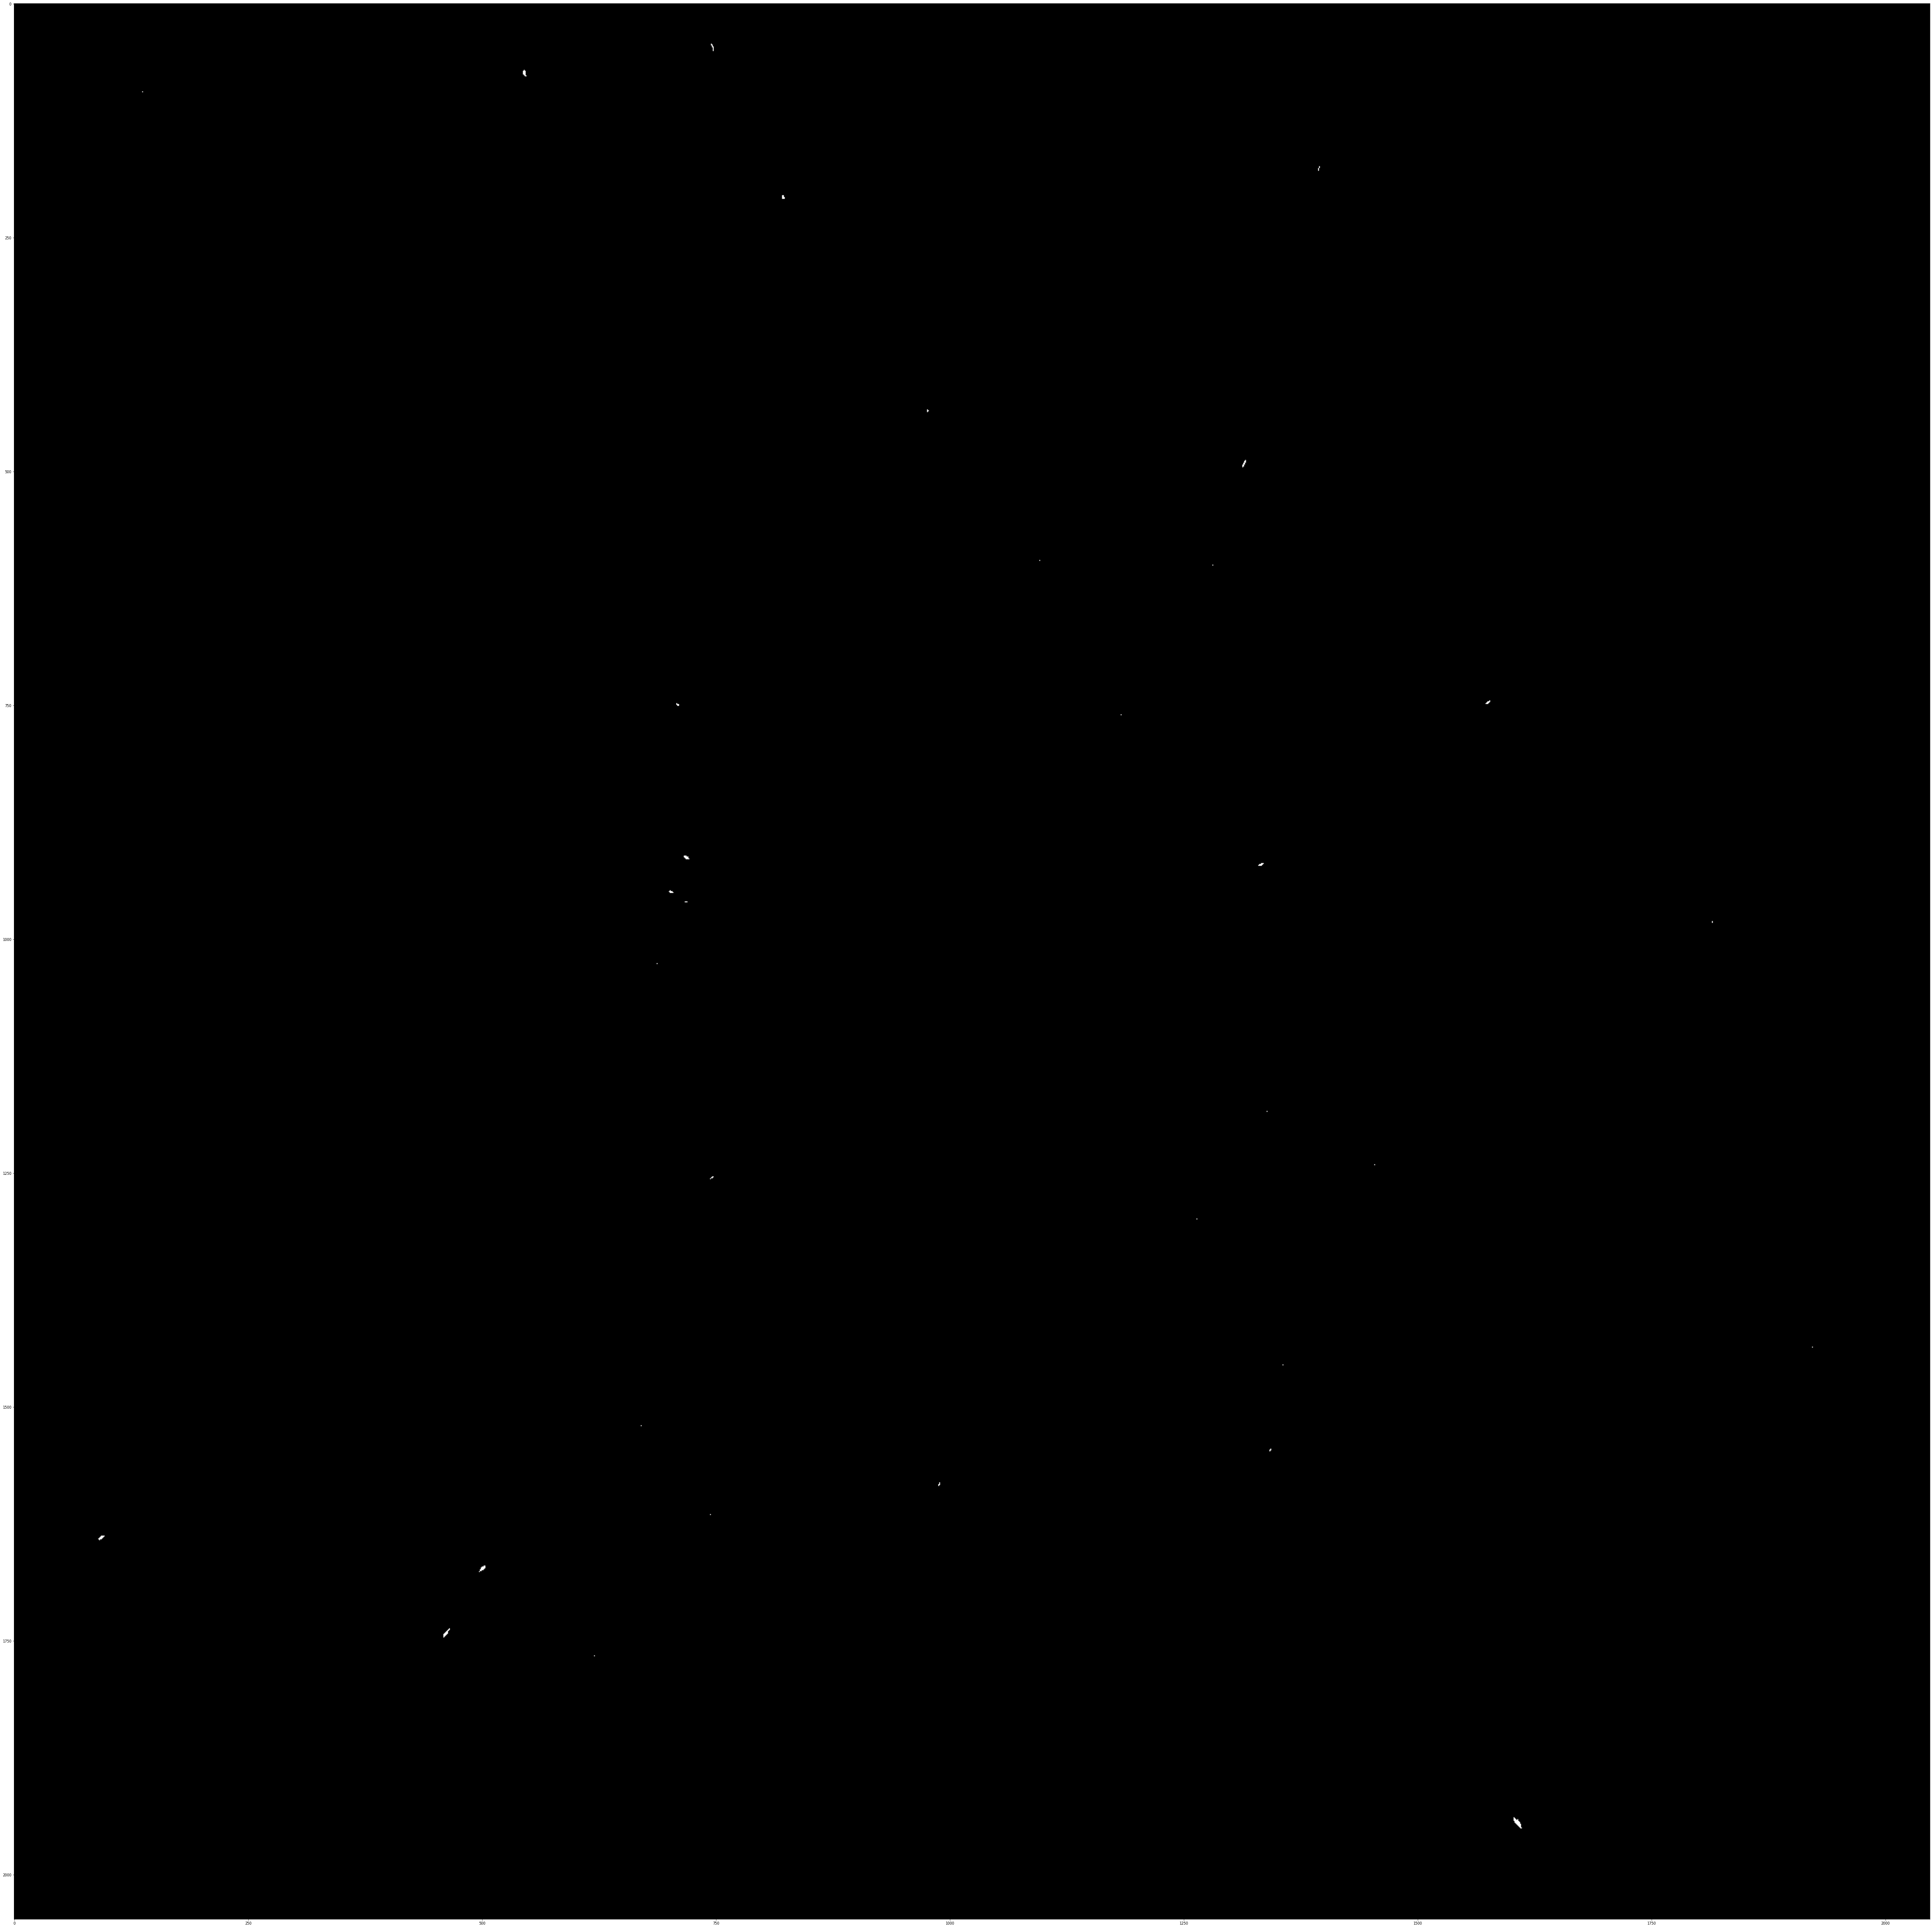

In [ ]:
scan2 = cv2.imread(scan_image_path[2]).astype('float64')

plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(scan2)
plt.show()

In [ ]:
white_cal = np.nonzero(cal)
white_cal

(array([  79,   79,   79, ..., 1843, 1843, 1843]),
 array([1084, 1084, 1084, ..., 1128, 1128, 1128]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [ ]:
list_coords = tuple(zip(white_scan[1], white_scan[0]))

# filtering out redundant coords
list_coords = list(dict.fromkeys(list_coords))

list_coords

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


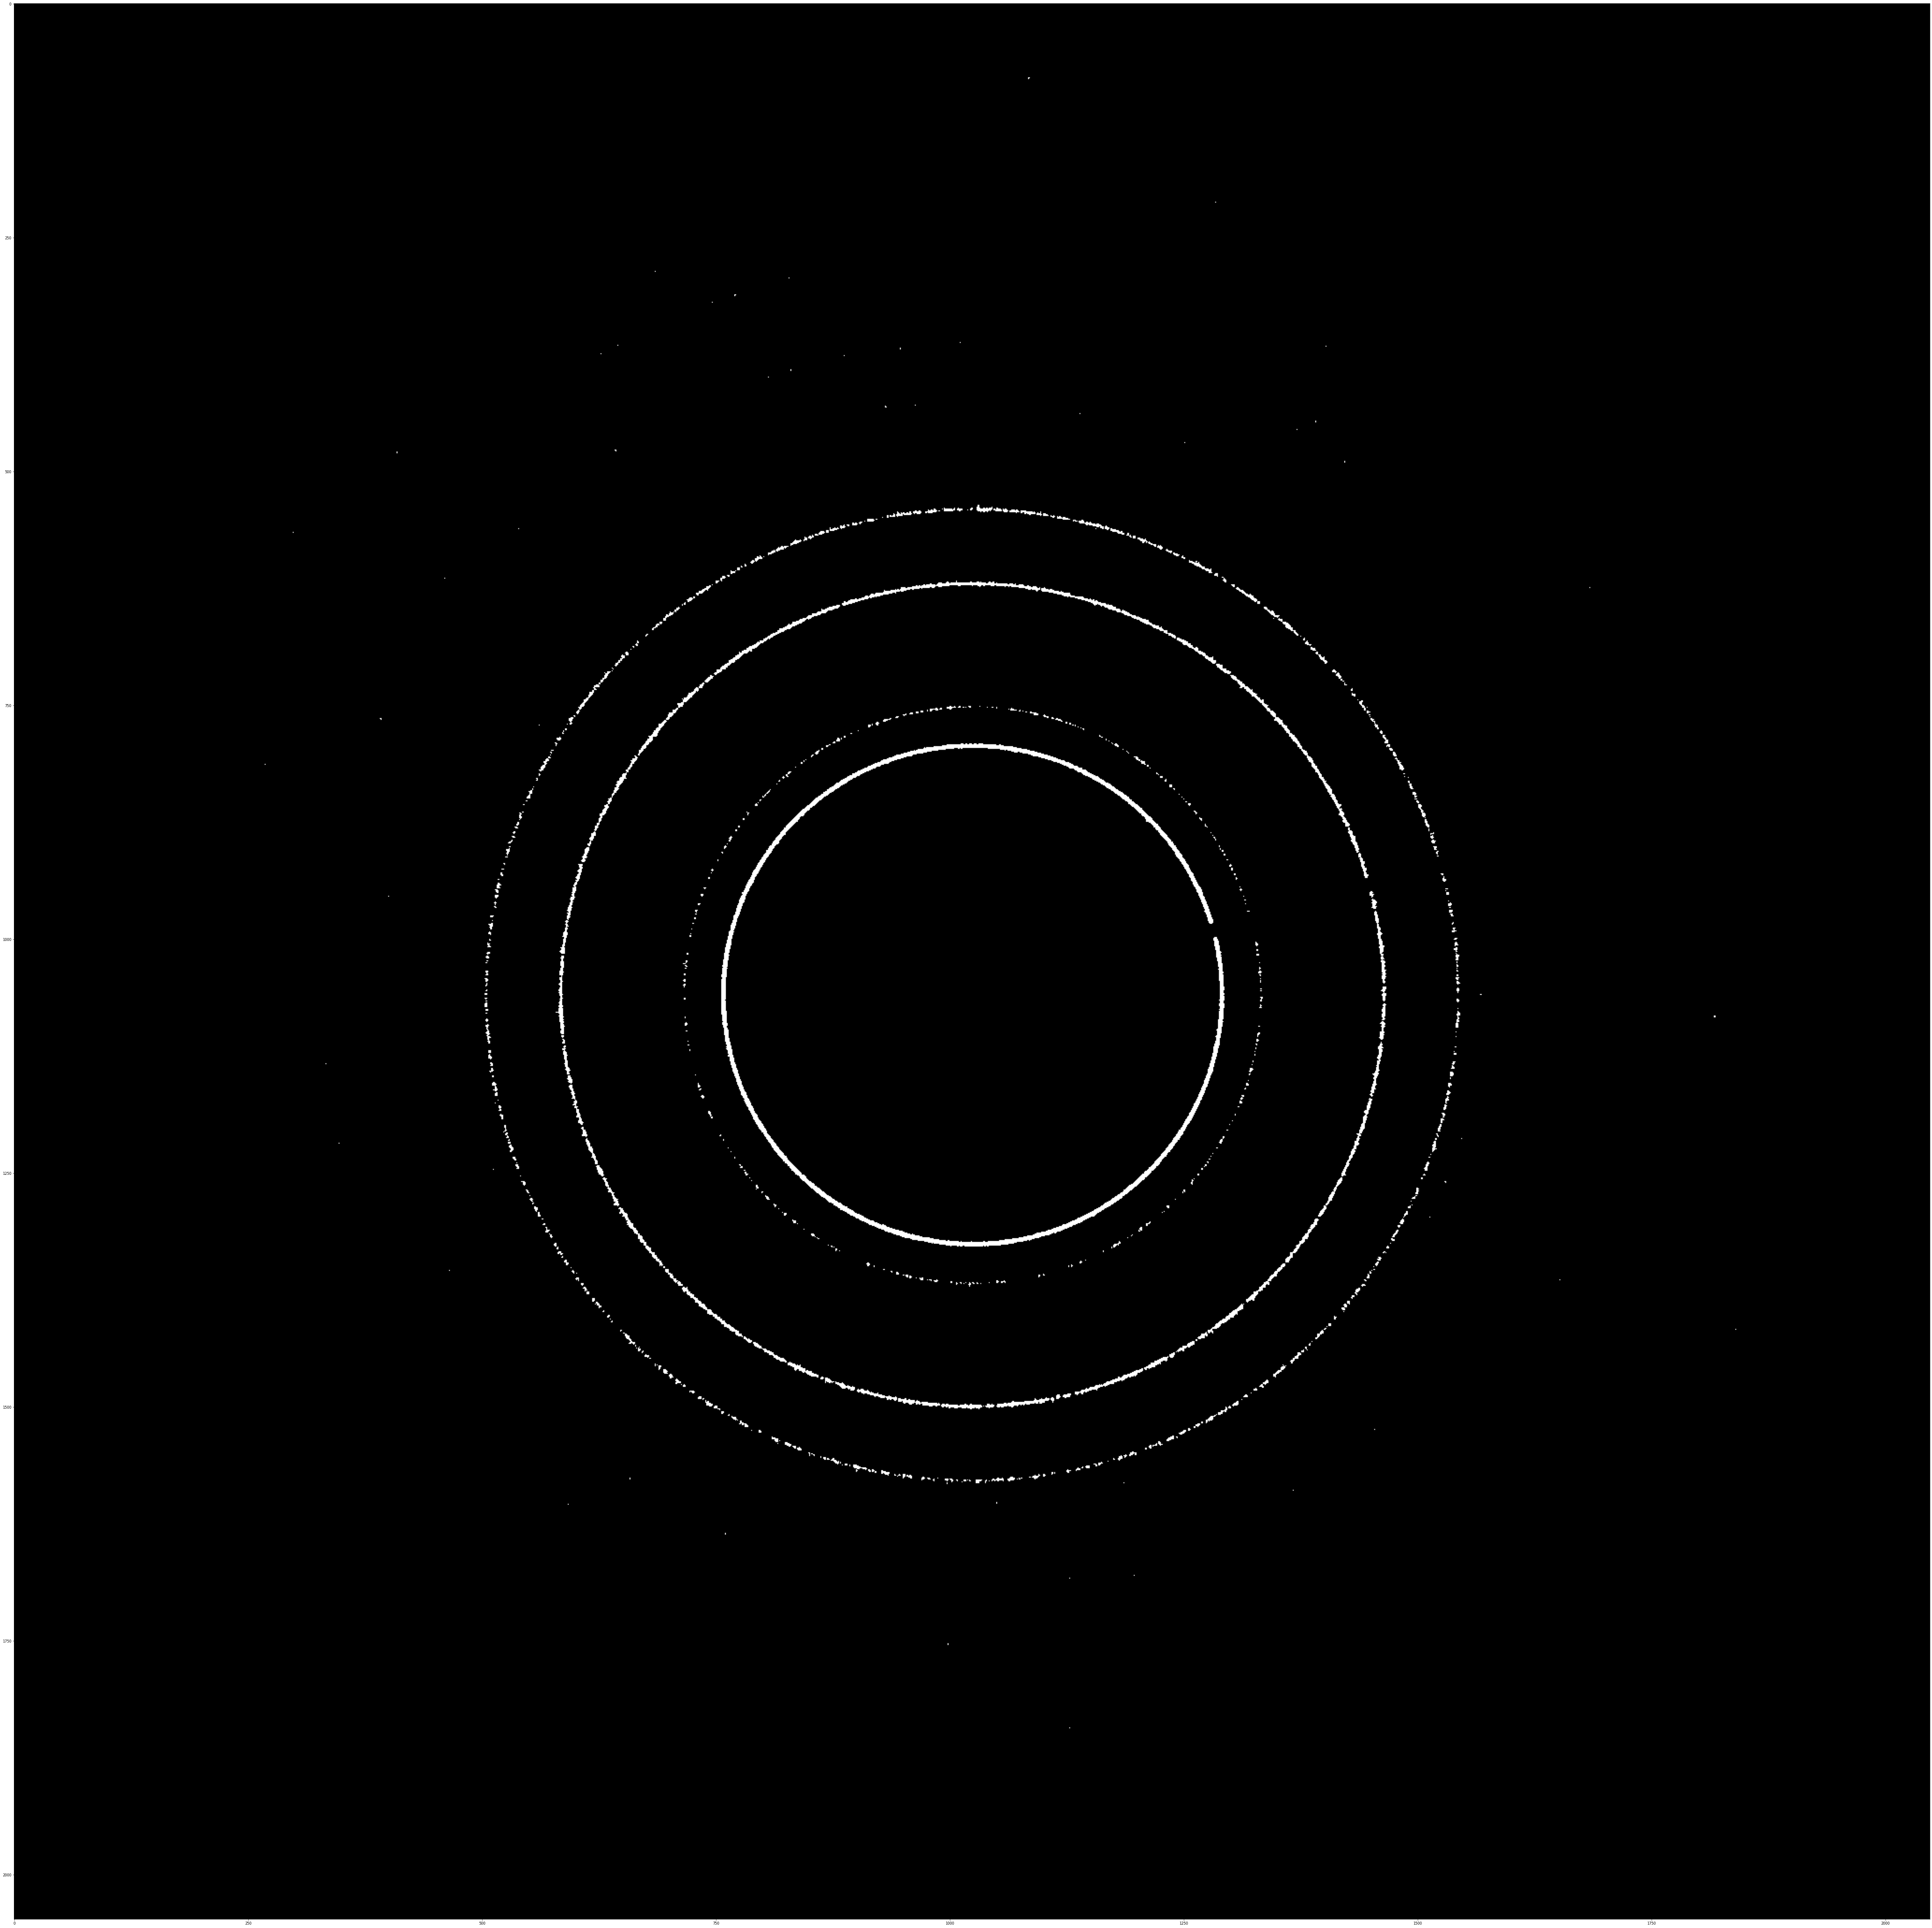

In [ ]:
# Calibration

plt.figure(figsize=(100, 100), dpi=60)
plt.imshow(cal)
plt.show()

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display
import glob

cal_image_path = '/home/anishio/Documents/ExampleData/40x41/calibration/CeO2_DMM30keV_400mm_20sec_PE_001.tif'
scan_image_path = glob.glob('/home/anishio/Documents/ExampleData/40x41/DMM_Zr_0p66GPa/*.tif')

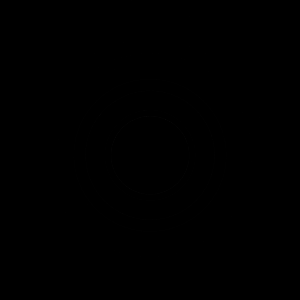

In [ ]:
img1 = Image.open(cal_image_path, 'r')
display(img1.resize((300,300)))

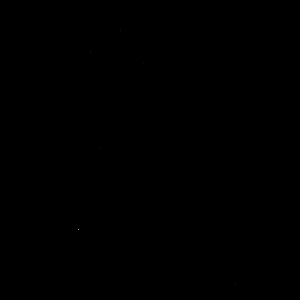

In [ ]:
img2 = Image.open(scan_image_path[638], 'r')
display(img2.resize((300, 300)))